<a href="https://colab.research.google.com/github/SUPAGORN0306/229352-StatisticalLearning/blob/main/Lab07_670510771_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Boosted tree models on a simulated dataset

- [AdaBoostClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn-ensemble-adaboostclassifier)
- [XGBClassifier documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
- [LGBMClassifier documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm-lgbmclassifier)
- [GridSeachCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


- [Data](https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip)


Perform GridSearchCV of the following three models on the provided training set (`X_train.csv` and `y_train.csv`)

1. Evaluate these models on the test set (`X_test.csv` and `y_test.csv`). **Keep searching (using cross-validation) until you find the model that achieves > 0.83 out-of-fold accuracy (use `GridSeachCV.best_score_` to obtain the out-of-fold accuracy)**

2. Report the test accuracy of your best model.

3. For each model, plot the feature importances

For `AdaBoostClassifier`, feature importances can be obtained by calling the `feature_importances_` attribute after fitting the model.

For `XGBClassifier` and `LGBMClassifier`, feature importances can be obtained using the library’s `plot_importance` function. Here is a minimal example in XGBoost:

In [42]:
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

In [43]:
from sklearn.ensemble import AdaBoostClassifier


ab = AdaBoostClassifier()
ab.fit(X, y)
ab.feature_importances_

array([0.        , 0.05832968, 0.33398566, 0.60768466])

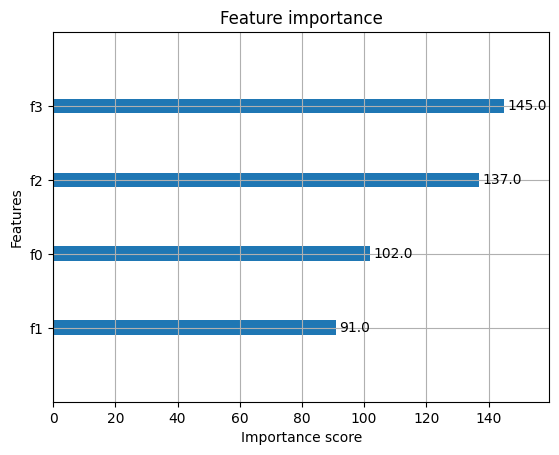

In [44]:
from xgboost import XGBClassifier, plot_importance


model = XGBClassifier()
model.fit(X, y)
plot_importance(model);

In [45]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


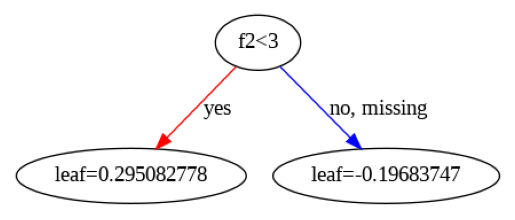

In [46]:
from xgboost import plot_tree

plot_tree(model, num_trees=3);

#Downloads files

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, plot_importance as plot_xgb_importance
from lightgbm import LGBMClassifier, plot_importance as plot_lgbm_importance
from sklearn.metrics import accuracy_score

In [48]:
X_train = pd.read_csv('X_train.csv', header=None)
y_train = pd.read_csv('y_train.csv', header=None)
X_test = pd.read_csv('X_test.csv', header=None)
y_test = pd.read_csv('y_test.csv', header=None)

#AdaBoost

In [49]:
param_ada = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_ada, cv=5, scoring='accuracy', n_jobs=-1)
grid_ada.fit(X_train, y_train)

print(f"AdaBoost Best Score: {grid_ada.best_score_:.4f}")

AdaBoost Best Score: 0.8442


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


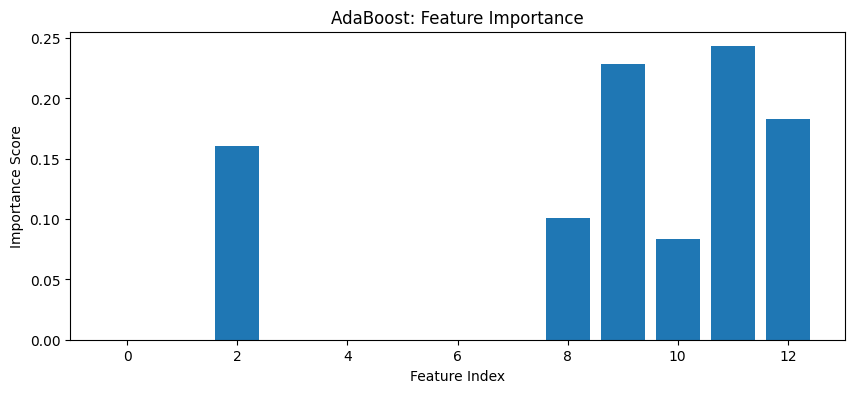

In [50]:
plt.figure(figsize=(10, 4))
plt.bar(range(X_train.shape[1]), grid_ada.best_estimator_.feature_importances_)
plt.title("AdaBoost: Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()

#XGBoost

In [51]:
param_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_xgb = GridSearchCV(XGBClassifier(random_state=42), param_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print(f"XGBoost Best Score: {grid_xgb.best_score_:.4f}")

XGBoost Best Score: 0.8299


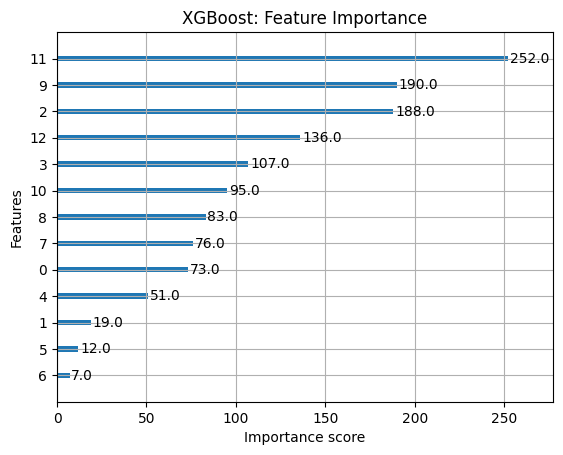

In [52]:
plot_xgb_importance(grid_xgb.best_estimator_)
plt.title("XGBoost: Feature Importance")
plt.show()

#Lightgbm

In [53]:
param_lgbm = {
    'n_estimators': [100, 200, 500],
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1]
}

grid_lgbm = GridSearchCV(LGBMClassifier(random_state=42), param_lgbm, cv=5, scoring='accuracy', n_jobs=-1)
grid_lgbm.fit(X_train, y_train)

print(f"LightGBM Best Score: {grid_lgbm.best_score_:.4f}")

[LightGBM] [Info] Number of positive: 115, number of negative: 97
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 221
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542453 -> initscore=0.170221
[LightGBM] [Info] Start training from score 0.170221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


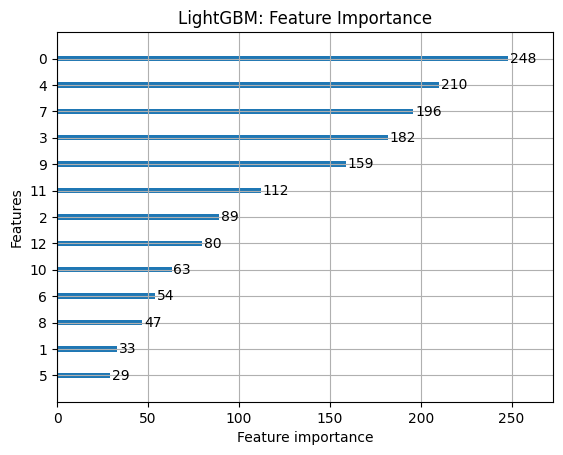

In [54]:
plot_lgbm_importance(grid_lgbm.best_estimator_)
plt.title("LightGBM: Feature Importance")
plt.show()

Find best m

In [55]:
scores = {
    'AdaBoost': grid_ada.best_score_,
    'XGBoost': grid_xgb.best_score_,
    'LightGBM': grid_lgbm.best_score_
}

best_name = max(scores, key=scores.get)
best_score = scores[best_name]

for name, score in scores.items():
    status = "✅ (>0.83)" if score > 0.83 else "❌ "
    print(f"{name}: Score = {score:.4f} {status}")

print(f"\nBest Model: {best_name}")

AdaBoost: Score = 0.8442 ✅ (>0.83)
XGBoost: Score = 0.8299 ❌ 
LightGBM: Score = 0.8018 ❌ 

Best Model: AdaBoost


In [57]:
best_model = {
    'AdaBoost': grid_ada.best_estimator_,
    'XGBoost': grid_xgb.best_estimator_,
    'LightGBM': grid_lgbm.best_estimator_
}[best_name]

y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8462
